In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./RELIANCE.csv')
df.set_index('Date',inplace=True)
df.dropna(inplace=True)
data=df.copy()


In [3]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

data.dropna(inplace=True)

In [4]:
from pmdarima import auto_arima

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
training_data=data[0:1800]
test_data=data[1800:]

In [7]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [8]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16434.483, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16438.932, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16433.015, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16432.812, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16437.031, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16434.635, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16434.623, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16434.765, Time=0.73 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16430.897, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16432.722, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16432.710, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16431.100, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16432.870, Time=0.30 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.648 seconds


In [9]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
forecast=model.predict(n_periods=len(test_data), X=test_data[ind_features])
forecast


1800    1267.275043
1801    1258.650901
1802    1258.993466
1803    1248.530964
1804    1237.387277
           ...     
2445    1871.121444
2446    1897.489647
2447    1907.677061
2448    1924.796036
2449    1954.544694
Length: 650, dtype: float64

In [11]:
forecast_df = pd.DataFrame(forecast, columns=['Forecast_ARIMA'])
forecast_df['Date'] = test_data.index
forecast_df = forecast_df.set_index('Date')
merged_df = pd.merge(test_data, forecast_df, 'outer', on='Date' )

In [12]:
forecast_df

,Forecast_ARIMA
Date,
2018-09-11,1267.275043
2018-09-12,1258.650901
2018-09-14,1258.993466
2018-09-17,1248.530964
2018-09-18,1237.387277
...,...
2021-04-26,1871.121444
2021-04-27,1897.489647
2021-04-28,1907.677061


In [13]:
import pickle

In [14]:
with open('file.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(forecast_df, file)

In [15]:
import matplotlib.pyplot as plt


In [16]:
# date=forecast_df['Date']
values=forecast_df['Forecast_ARIMA']

In [17]:
forecast_df

,Forecast_ARIMA
Date,
2018-09-11,1267.275043
2018-09-12,1258.650901
2018-09-14,1258.993466
2018-09-17,1248.530964
2018-09-18,1237.387277
...,...
2021-04-26,1871.121444
2021-04-27,1897.489647
2021-04-28,1907.677061


<AxesSubplot:xlabel='Date'>

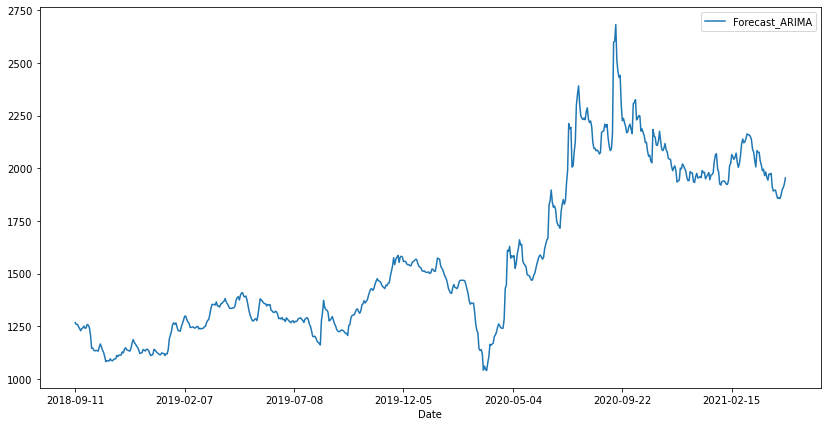

In [18]:
forecast_df[['Forecast_ARIMA']].plot(figsize=(14,7))